## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  48.616053  1051.734534  0.628346  4.684279  1.680437
1   9.956904   211.625164  0.086003  3.293180  0.808100
2  89.732850   369.993599  0.723843  8.340986  1.262255
3  24.369644  1656.469152  0.321174  8.386604  1.479169
4  42.668982   765.063256  0.237299  4.651678  1.585883


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.77423 | train_mse: 6.55808 | train_mae: 1.49853 |  0:00:00s
epoch 1  | loss: 0.53313 | train_mse: 5.51367 | train_mae: 1.42435 |  0:00:00s
epoch 2  | loss: 0.44172 | train_mse: 3.81787 | train_mae: 1.11583 |  0:00:00s


epoch 3  | loss: 0.39496 | train_mse: 1.96785 | train_mae: 0.96158 |  0:00:00s
epoch 4  | loss: 0.40313 | train_mse: 1.5492  | train_mae: 0.9268  |  0:00:00s
epoch 5  | loss: 0.31838 | train_mse: 1.2581  | train_mae: 0.88269 |  0:00:00s


epoch 6  | loss: 0.30003 | train_mse: 0.68956 | train_mae: 0.66432 |  0:00:00s
epoch 7  | loss: 0.38995 | train_mse: 0.55593 | train_mae: 0.57139 |  0:00:00s
epoch 8  | loss: 0.22157 | train_mse: 1.9125  | train_mae: 0.93408 |  0:00:00s


epoch 9  | loss: 0.42567 | train_mse: 1.02539 | train_mae: 0.79261 |  0:00:01s
epoch 10 | loss: 0.22891 | train_mse: 0.84906 | train_mae: 0.74262 |  0:00:01s
epoch 11 | loss: 0.24223 | train_mse: 0.84171 | train_mae: 0.73404 |  0:00:01s


epoch 12 | loss: 0.28085 | train_mse: 0.74561 | train_mae: 0.65993 |  0:00:01s
epoch 13 | loss: 0.15629 | train_mse: 0.66473 | train_mae: 0.60018 |  0:00:01s
epoch 14 | loss: 0.25331 | train_mse: 0.59259 | train_mae: 0.58292 |  0:00:01s


epoch 15 | loss: 0.25768 | train_mse: 0.34801 | train_mae: 0.46744 |  0:00:01s
epoch 16 | loss: 0.16672 | train_mse: 0.32052 | train_mae: 0.45658 |  0:00:01s
epoch 17 | loss: 0.1736  | train_mse: 0.68166 | train_mae: 0.62036 |  0:00:01s


epoch 18 | loss: 0.18583 | train_mse: 0.89609 | train_mae: 0.69931 |  0:00:01s
epoch 19 | loss: 0.17685 | train_mse: 0.78642 | train_mae: 0.69024 |  0:00:01s
epoch 20 | loss: 0.21594 | train_mse: 0.42072 | train_mae: 0.5053  |  0:00:01s


epoch 21 | loss: 0.20991 | train_mse: 0.38846 | train_mae: 0.51232 |  0:00:02s
epoch 22 | loss: 0.15057 | train_mse: 0.34559 | train_mae: 0.47823 |  0:00:02s
epoch 23 | loss: 0.16822 | train_mse: 0.38299 | train_mae: 0.49071 |  0:00:02s


epoch 24 | loss: 0.23941 | train_mse: 0.27371 | train_mae: 0.40882 |  0:00:02s
epoch 25 | loss: 0.14425 | train_mse: 0.21073 | train_mae: 0.36165 |  0:00:02s
epoch 26 | loss: 0.26222 | train_mse: 0.21935 | train_mae: 0.37072 |  0:00:02s


epoch 27 | loss: 0.15994 | train_mse: 0.19569 | train_mae: 0.34628 |  0:00:02s
epoch 28 | loss: 0.16441 | train_mse: 0.16828 | train_mae: 0.33236 |  0:00:02s
epoch 29 | loss: 0.26208 | train_mse: 0.1432  | train_mae: 0.29926 |  0:00:02s


epoch 30 | loss: 0.174   | train_mse: 0.14588 | train_mae: 0.29966 |  0:00:02s


epoch 31 | loss: 0.15075 | train_mse: 0.13253 | train_mae: 0.27576 |  0:00:03s
epoch 32 | loss: 0.11384 | train_mse: 0.13998 | train_mae: 0.29288 |  0:00:03s
epoch 33 | loss: 0.21385 | train_mse: 0.14471 | train_mae: 0.30985 |  0:00:03s


epoch 34 | loss: 0.23263 | train_mse: 0.17423 | train_mae: 0.33443 |  0:00:03s
epoch 35 | loss: 0.16729 | train_mse: 0.17199 | train_mae: 0.32888 |  0:00:03s
epoch 36 | loss: 0.22177 | train_mse: 0.14709 | train_mae: 0.29999 |  0:00:03s


epoch 37 | loss: 0.16226 | train_mse: 0.13538 | train_mae: 0.28045 |  0:00:03s
epoch 38 | loss: 0.18763 | train_mse: 0.13185 | train_mae: 0.2827  |  0:00:03s
epoch 39 | loss: 0.1612  | train_mse: 0.18473 | train_mae: 0.3497  |  0:00:03s


epoch 40 | loss: 0.14228 | train_mse: 0.16181 | train_mae: 0.32475 |  0:00:03s
epoch 41 | loss: 0.11906 | train_mse: 0.13394 | train_mae: 0.28614 |  0:00:03s
epoch 42 | loss: 0.21158 | train_mse: 0.12928 | train_mae: 0.27794 |  0:00:04s


epoch 43 | loss: 0.1362  | train_mse: 0.12748 | train_mae: 0.27249 |  0:00:04s
epoch 44 | loss: 0.18648 | train_mse: 0.12806 | train_mae: 0.27956 |  0:00:04s
epoch 45 | loss: 0.15545 | train_mse: 0.15715 | train_mae: 0.31614 |  0:00:04s


epoch 46 | loss: 0.13888 | train_mse: 0.167   | train_mae: 0.32171 |  0:00:04s
epoch 47 | loss: 0.12512 | train_mse: 0.12146 | train_mae: 0.26918 |  0:00:04s
epoch 48 | loss: 0.15249 | train_mse: 0.11469 | train_mae: 0.25774 |  0:00:04s


epoch 49 | loss: 0.1409  | train_mse: 0.10903 | train_mae: 0.25669 |  0:00:04s
epoch 50 | loss: 0.13319 | train_mse: 0.10355 | train_mae: 0.24932 |  0:00:04s
epoch 51 | loss: 0.16515 | train_mse: 0.10657 | train_mae: 0.25589 |  0:00:04s


epoch 52 | loss: 0.10881 | train_mse: 0.09328 | train_mae: 0.23857 |  0:00:04s
epoch 53 | loss: 0.13306 | train_mse: 0.09059 | train_mae: 0.23695 |  0:00:04s
epoch 54 | loss: 0.22491 | train_mse: 0.08901 | train_mae: 0.22911 |  0:00:05s


epoch 55 | loss: 0.09642 | train_mse: 0.09588 | train_mae: 0.23927 |  0:00:05s
epoch 56 | loss: 0.14856 | train_mse: 0.11397 | train_mae: 0.25872 |  0:00:05s


epoch 57 | loss: 0.14994 | train_mse: 0.10209 | train_mae: 0.24962 |  0:00:05s
epoch 58 | loss: 0.11198 | train_mse: 0.08876 | train_mae: 0.22642 |  0:00:05s
epoch 59 | loss: 0.11252 | train_mse: 0.09298 | train_mae: 0.23582 |  0:00:05s


epoch 60 | loss: 0.15513 | train_mse: 0.10937 | train_mae: 0.26106 |  0:00:05s
epoch 61 | loss: 0.15252 | train_mse: 0.10618 | train_mae: 0.25164 |  0:00:05s
epoch 62 | loss: 0.15741 | train_mse: 0.09395 | train_mae: 0.23491 |  0:00:05s


epoch 63 | loss: 0.13578 | train_mse: 0.08238 | train_mae: 0.22474 |  0:00:05s
epoch 64 | loss: 0.11703 | train_mse: 0.09525 | train_mae: 0.24527 |  0:00:05s
epoch 65 | loss: 0.14339 | train_mse: 0.11712 | train_mae: 0.2721  |  0:00:06s


epoch 66 | loss: 0.18887 | train_mse: 0.12764 | train_mae: 0.28062 |  0:00:06s
epoch 67 | loss: 0.10524 | train_mse: 0.10257 | train_mae: 0.25046 |  0:00:06s
epoch 68 | loss: 0.1184  | train_mse: 0.0944  | train_mae: 0.23939 |  0:00:06s


epoch 69 | loss: 0.13833 | train_mse: 0.09641 | train_mae: 0.24634 |  0:00:06s
epoch 70 | loss: 0.12775 | train_mse: 0.09663 | train_mae: 0.24283 |  0:00:06s
epoch 71 | loss: 0.10077 | train_mse: 0.10579 | train_mae: 0.25335 |  0:00:06s


epoch 72 | loss: 0.21013 | train_mse: 0.13514 | train_mae: 0.2846  |  0:00:06s
epoch 73 | loss: 0.12582 | train_mse: 0.14047 | train_mae: 0.29193 |  0:00:06s
epoch 74 | loss: 0.17857 | train_mse: 0.11383 | train_mae: 0.26134 |  0:00:06s


epoch 75 | loss: 0.13603 | train_mse: 0.11616 | train_mae: 0.25918 |  0:00:06s
epoch 76 | loss: 0.13352 | train_mse: 0.12246 | train_mae: 0.26247 |  0:00:07s
epoch 77 | loss: 0.12832 | train_mse: 0.10803 | train_mae: 0.23764 |  0:00:07s


epoch 78 | loss: 0.1454  | train_mse: 0.10662 | train_mae: 0.24021 |  0:00:07s
epoch 79 | loss: 0.18216 | train_mse: 0.12295 | train_mae: 0.26512 |  0:00:07s
epoch 80 | loss: 0.17199 | train_mse: 0.13103 | train_mae: 0.27883 |  0:00:07s


epoch 81 | loss: 0.16264 | train_mse: 0.13304 | train_mae: 0.28004 |  0:00:07s
epoch 82 | loss: 0.17946 | train_mse: 0.11861 | train_mae: 0.25617 |  0:00:07s
epoch 83 | loss: 0.13206 | train_mse: 0.10537 | train_mae: 0.23659 |  0:00:07s


epoch 84 | loss: 0.12574 | train_mse: 0.10514 | train_mae: 0.23678 |  0:00:07s
epoch 85 | loss: 0.14159 | train_mse: 0.1048  | train_mae: 0.23817 |  0:00:07s
epoch 86 | loss: 0.11317 | train_mse: 0.11684 | train_mae: 0.26179 |  0:00:07s


epoch 87 | loss: 0.18608 | train_mse: 0.13511 | train_mae: 0.28624 |  0:00:07s
epoch 88 | loss: 0.167   | train_mse: 0.10769 | train_mae: 0.25241 |  0:00:08s
epoch 89 | loss: 0.19021 | train_mse: 0.10769 | train_mae: 0.25998 |  0:00:08s


epoch 90 | loss: 0.14983 | train_mse: 0.12233 | train_mae: 0.27251 |  0:00:08s
epoch 91 | loss: 0.1378  | train_mse: 0.11349 | train_mae: 0.25849 |  0:00:08s
epoch 92 | loss: 0.09509 | train_mse: 0.11666 | train_mae: 0.26577 |  0:00:08s


epoch 93 | loss: 0.18918 | train_mse: 0.10498 | train_mae: 0.25447 |  0:00:08s
epoch 94 | loss: 0.13277 | train_mse: 0.1085  | train_mae: 0.26525 |  0:00:08s
epoch 95 | loss: 0.10249 | train_mse: 0.1048  | train_mae: 0.25926 |  0:00:08s


epoch 96 | loss: 0.14592 | train_mse: 0.09481 | train_mae: 0.2523  |  0:00:08s
epoch 97 | loss: 0.1253  | train_mse: 0.09706 | train_mae: 0.2523  |  0:00:08s
epoch 98 | loss: 0.1486  | train_mse: 0.09619 | train_mae: 0.25196 |  0:00:08s


epoch 99 | loss: 0.30433 | train_mse: 0.09217 | train_mae: 0.24696 |  0:00:08s
epoch 100| loss: 0.09876 | train_mse: 0.0992  | train_mae: 0.25724 |  0:00:09s
epoch 101| loss: 0.19099 | train_mse: 0.10089 | train_mae: 0.25996 |  0:00:09s


epoch 102| loss: 0.1674  | train_mse: 0.09386 | train_mae: 0.24432 |  0:00:09s
epoch 103| loss: 0.13182 | train_mse: 0.09304 | train_mae: 0.23836 |  0:00:09s
epoch 104| loss: 0.17992 | train_mse: 0.09466 | train_mae: 0.23764 |  0:00:09s


epoch 105| loss: 0.11406 | train_mse: 0.09066 | train_mae: 0.23433 |  0:00:09s
epoch 106| loss: 0.16653 | train_mse: 0.10225 | train_mae: 0.25873 |  0:00:09s
epoch 107| loss: 0.11497 | train_mse: 0.12074 | train_mae: 0.27951 |  0:00:09s


epoch 108| loss: 0.12856 | train_mse: 0.10728 | train_mae: 0.25478 |  0:00:09s
epoch 109| loss: 0.08906 | train_mse: 0.10943 | train_mae: 0.2558  |  0:00:09s
epoch 110| loss: 0.16616 | train_mse: 0.10021 | train_mae: 0.24802 |  0:00:09s


epoch 111| loss: 0.24725 | train_mse: 0.09438 | train_mae: 0.24326 |  0:00:10s
epoch 112| loss: 0.13887 | train_mse: 0.11106 | train_mae: 0.26329 |  0:00:10s
epoch 113| loss: 0.14611 | train_mse: 0.11368 | train_mae: 0.26735 |  0:00:10s

Early stopping occurred at epoch 113 with best_epoch = 63 and best_train_mae = 0.22474
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

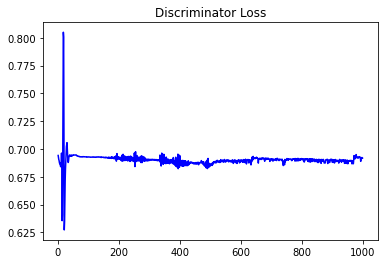

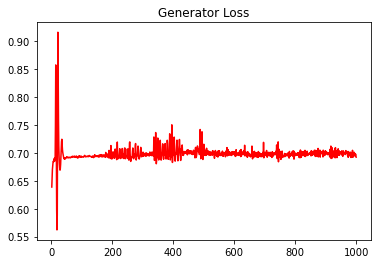

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4805794414831653


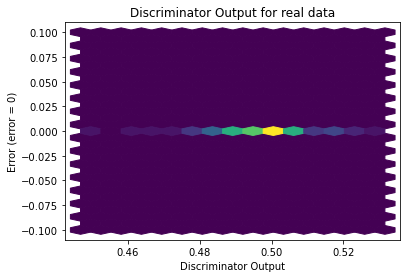

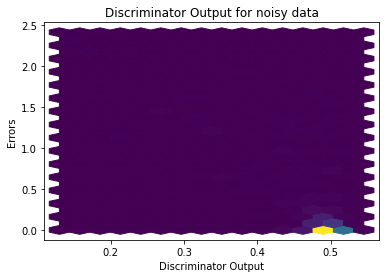

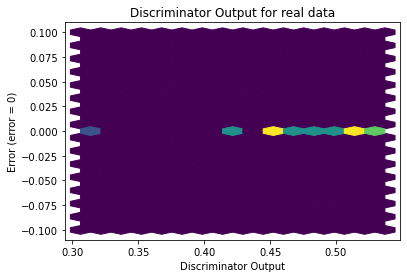

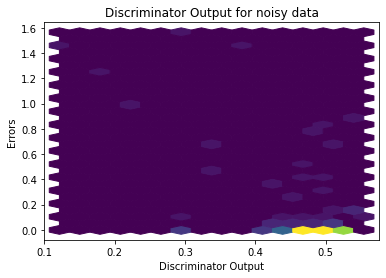

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


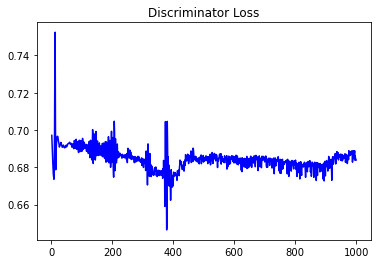

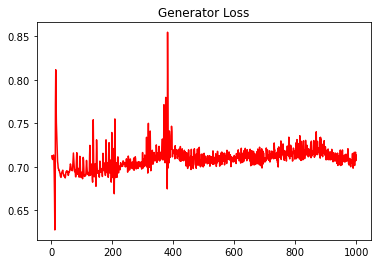

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5623959414103781


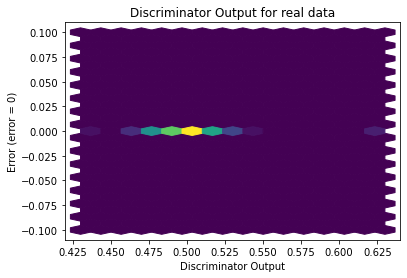

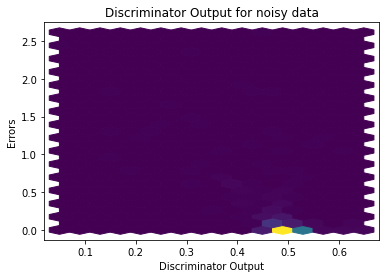

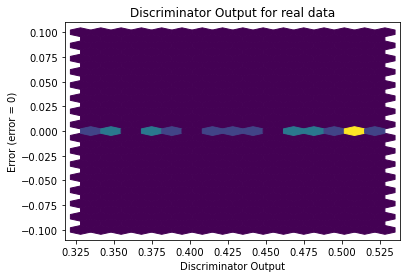

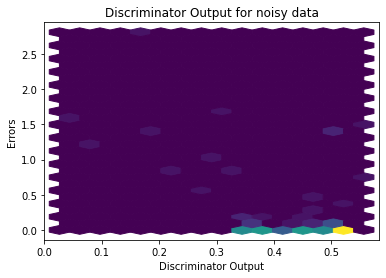

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3266]], requires_grad=True)
